I am analyzing twitter data based on the sector. I have chosen JPM Chase for financial sector, Apple for technological sector and Pfizer from healthcare sector.
I  have used a dataset from kaggle to analyze sentiment for Apple.
I need to create a dataframe for JPM and Pfizer tweets:

In [2]:
!pip install tweepy

In [3]:
!pip install textblob

In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
import json

In [6]:
log1 = pd.read_csv('login.csv')

In [7]:
ckey=log1['Key'][0]
cs=log1['Key'][1]
at = log1['Key'][2]
ats = log1['Key'][3]

In [8]:
#create the twitter authentication
aunthenticate = tweepy.OAuthHandler(ckey,cs)
aunthenticate.set_access_token(at,ats)
api = tweepy.API(aunthenticate,wait_on_rate_limit=True)

Focusing on tech companies to analyze sentiment and stck price

In [17]:
import seaborn as sns
from scipy import stats as stat

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
company_tweets = pd.read_csv("company_tweet.csv")
tweet = pd.read_csv("tweet.csv")

In [20]:
tweets = pd.merge(company_tweets, tweet, on='tweet_id', how='inner')

In [21]:
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [22]:
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')

In [23]:
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))

In [24]:
tweets['date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

In [25]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tweet_id       int64         
 1   ticker_symbol  object        
 2   writer         object        
 3   post_date      datetime64[ns]
 4   body           object        
 5   comment_num    int64         
 6   retweet_num    int64         
 7   like_num       int64         
 8   date           datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 330.8+ MB


In [26]:
tweets = tweets.drop(['tweet_id'],axis=1)

In [27]:
tweets.isna().sum()

ticker_symbol        0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
date                 0
dtype: int64

In [28]:
tweets.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [29]:
aapl = tweets[tweets['ticker_symbol'] == 'AAPL']
tsla = tweets[tweets['ticker_symbol'] == 'TSLA']
amzn = tweets[tweets['ticker_symbol'] == 'AMZN']
msft = tweets[tweets['ticker_symbol'] == 'MSFT']
goog = tweets[tweets['ticker_symbol'] == 'GOOG']
googl = tweets[tweets['ticker_symbol'] == 'GOOGL'] ## With stockholders voting rights

In [30]:
!pip install yfinance

In [31]:
import yfinance as yf

In [32]:
aapl_stock = yf.Ticker('AAPL')

In [33]:
start = min(aapl['date'])
end = max(aapl['date'])

aapl_stock = aapl_stock.history(start=start.date(), end=end.date())

In [34]:
aapl_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,25.286885,25.298236,24.369756,24.819241,212818400,0.0,0
2015-01-05,24.583150,24.664874,23.929355,24.120045,257142000,0.0,0
2015-01-06,24.185883,24.387924,23.752289,24.122320,263188400,0.0,0
2015-01-07,24.335706,24.562718,24.222200,24.460564,160423600,0.0,0
2015-01-08,24.796547,25.459422,24.676229,25.400398,237458000,0.0,0
...,...,...,...,...,...,...,...
2019-12-23,69.310552,70.229652,69.271019,70.167885,98572000,0.0,0
2019-12-24,70.338354,70.387771,69.901043,70.234581,48478800,0.0,0
2019-12-26,70.370482,71.645364,70.340834,71.628067,93121200,0.0,0


In [35]:
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['date']).date(),end=max(aapl['date']).date())

I would like to find out if the amount of tweets affects the volume traded of the particular company. 

In [36]:
def tweet_vol_affect(tweets,stocks,title):
    tweet_shift1 = tweets.groupby('date').size().shift(-1).dropna() 
    stock_data = stocks['Volume'].dropna()
    corr, pval = stat.spearmanr(tweet_shift1.reindex(stock_data.index), stock_data,nan_policy='omit')
    tweets_vol = tweets.groupby('date').size().rolling(30).mean().dropna()
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title+" \n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


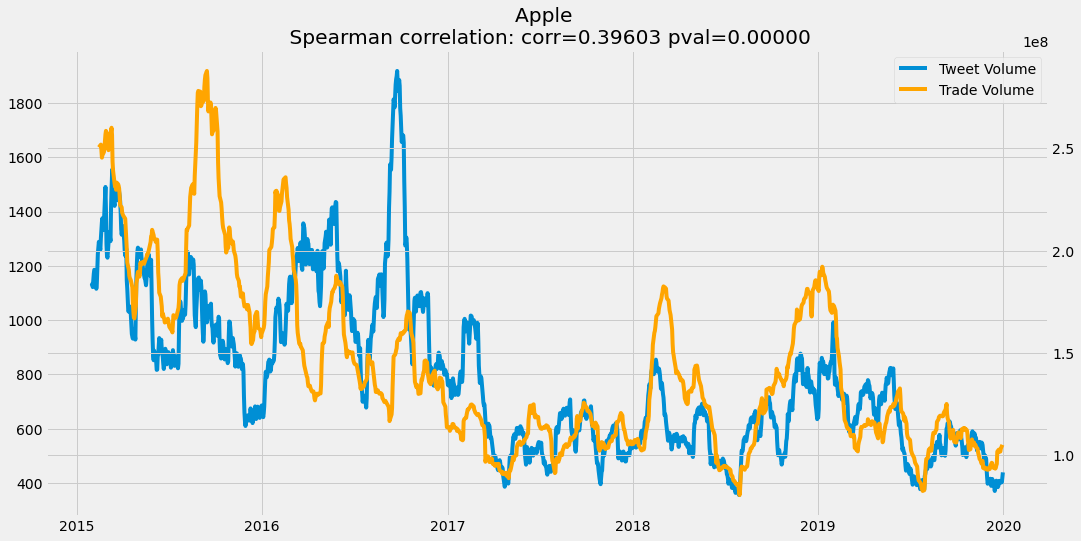

In [37]:
tweet_vol_affect(aapl,aapl_stock,"Apple")

Looking at it, it appears that the shear volume of tweets does seems to have a positive correlation with the trade volume. However, the strength of the correlation is questionable. 

Classifying Positive and negative tweets

In [38]:
!pip install afinn

In [39]:
from afinn import Afinn
afinn = Afinn()

In [40]:
aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))

C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


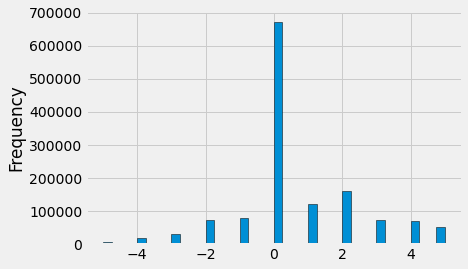

In [41]:
aapl.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

In [42]:
def sentiment_overtime(tweets,stock,title):
    visual= tweets.groupby('date')['score'].mean().shift(-1).rolling(30).mean().dropna()
    corr_test = tweets.groupby('date')['score'].mean().shift(-1).dropna()
    corr, pval = stat.spearmanr(corr_test.reindex(stock.index), stock['Open'],nan_policy='omit')

    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    ax1.plot(visual.index,visual,label='Tweets Sentiment')
    ax2.plot(stock.index,stock['Close'],color='orange',label='share price')
    ax2.set_title("Effects of "+title+" tweets to shareprice" +"\n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()

C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


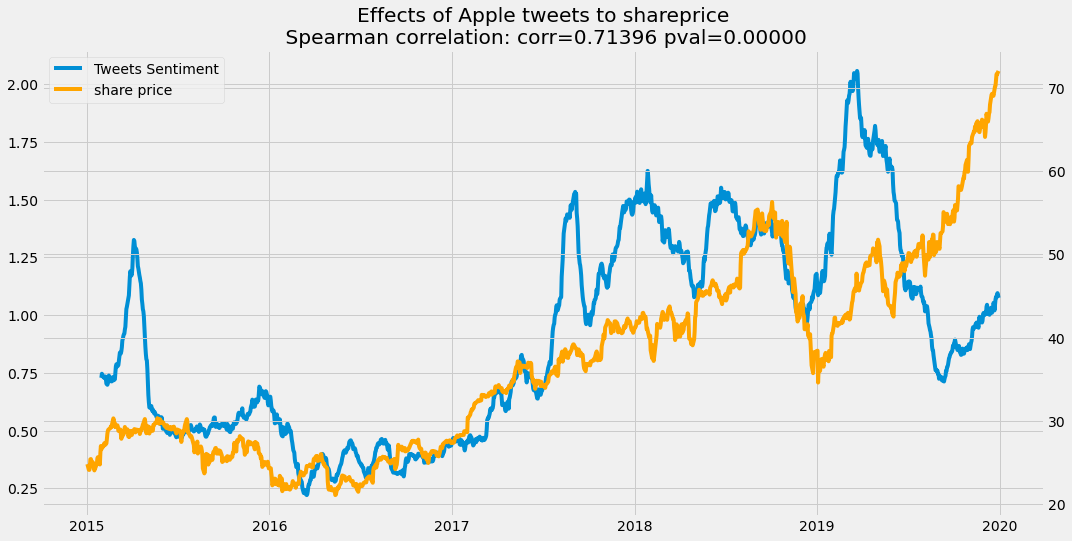

In [43]:
sentiment_overtime(aapl,aapl_stock,"Apple");

In [48]:
for tweet in tweetsfi:
    print(tweet.date)

In [61]:
from IPython.display import display

In [62]:
# We create a pandas dataframe as follows:
data1 = pd.DataFrame(data=[tweet.text for tweet in tweetsfi], columns=['Tweets'])



In [63]:
# We display the first 10 elements of the dataframe:
display(data1.head())

,Tweets


In [66]:
# Iterate and print tweets
for tweet in tweetsfi:
    print(tweet.text)

Getting tweet from Pfizer Tweeter account and their tweet volume and stock price is going to be analyzed

In [73]:
log1 = pd.read_csv('login.csv')

In [74]:
ckey=log1['Key'][0]
cs=log1['Key'][1]
at = log1['Key'][2]
ats = log1['Key'][3]

In [75]:
#create the twitter authentication
aunthenticate = tweepy.OAuthHandler(ckey,cs)
aunthenticate.set_access_token(at,ats)
api = tweepy.API(aunthenticate,wait_on_rate_limit=True)

In [78]:
pip install jsonpickle

Note: you may need to restart the kernel to use updated packages.


In [81]:
import sys
import jsonpickle
import os

searchQuery = '@pfizer' #'#someHashtag'  # this is what we're searching for
maxTweets = 10000# Some arbitrary large number
tweetsPerQry = 100 # this is the max the API permits
fName = 'tweetspi.txt' # We'll store the tweets in a text file..

In [82]:
# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = None

# If results only below a specific ID are, set max_id to that ID.
# else default to no upper limit, start from the most recent tweet matching the search query.
max_id=-1
tweetCount = 0
#print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False,
                                count=tweetsPerQry)
                else:
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False,
                                count=tweetsPerQry,
                                max_id=str(max_id - 1),
                                since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False, 
                                count=tweetsPerQry,
                                max_id=str(max_id - 1))
                else:
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False, count=tweetsPerQry,
                                            max_id=str(max_id - 1),
                                            since_id=sinceId)
            if not new_tweets:
                #print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) +
                        '\n')
            tweetCount += len(new_tweets)
            #print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break

In [83]:

import json
import pandas as pd

In [84]:
tweets_data_path = 'tweetspi.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [89]:
tweets = pd.DataFrame() #create pandas dataframe
tweets['TimeStamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['Name'] = list(map(lambda tweet: tweet["user"]["screen_name"], tweets_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweets['Favorites'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
tweets['Retweet'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweets['in_reply_to_status_id_str'] = list(map(lambda tweet: tweet['in_reply_to_status_id_str'], tweets_data))
tweets['in_reply_to_screen_name'] = list(map(lambda tweet: tweet['in_reply_to_screen_name'], tweets_data))

In [90]:
tweets.head()

,TimeStamp,Name,text,lang,tweet_id,Favorites,Retweet,in_reply_to_status_id_str,in_reply_to_screen_name
0,Mon Jul 19 14:24:01 +0000 2021,pfizer,Today we announced that Christopher Stevo has ...,en,1417128096273154051,28,2,None,None
1,Mon Jul 19 13:00:01 +0000 2021,pfizer,Health inequities impact patients with drug-re...,en,1417106957828296708,32,9,None,None
2,Sat Jul 17 15:00:13 +0000 2021,pfizer,Pfizer is committed to delivering breakthrough...,en,1416412431388192768,64,11,None,None
3,Thu Jul 15 20:26:22 +0000 2021,pfizer,We’re looking at menopause through a different...,en,1415769734038147081,48,7,None,None
4,Thu Jul 15 19:00:01 +0000 2021,pfizer,"“As a parent, when my daughters experience a f...",en,1415748000052174849,43,7,None,None


Data Cleaning Process:
Extract the username through the tweets, if applicable
Remove the URLs, RTs, and twitter handles from the tweet text
Remove specific punctuation
Cast to lowercase and delete the double space with the function apply

In [91]:
%%time

pd.options.mode.chained_assignment = None

#extract the username through the tweets (preceded by @ or by RT @)
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


Wall time: 43.6 s


In [92]:
#delete certains punctuations, put the text in lower case and delete the double space with the function apply
import re
tweets['text'] = tweets['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets['text'] = tweets['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['text'][0]

'today we announced that christopher stevo has joined pfizer as senior vice president and chief investor relations o…'


Cleaning Time Data from the data frame for analysis with Pfizer stock data.

In [125]:
from datetime import datetime
from datetime import timezone    



In [126]:


tweets['TimeStamp'] = pd.to_datetime(tweets['TimeStamp'])
print (tweets)
                

               TimeStamp    Name  \
0    2021-07-19 14:24:01  pfizer   
1    2021-07-19 13:00:01  pfizer   
2    2021-07-17 15:00:13  pfizer   
3    2021-07-15 20:26:22  pfizer   
4    2021-07-15 19:00:01  pfizer   
...                  ...     ...   
3242 2017-12-11 21:47:01  pfizer   
3243 2017-12-11 21:40:01  pfizer   
3244 2017-12-11 16:45:23  pfizer   
3245 2017-12-11 16:18:02  pfizer   
3246 2017-12-11 15:15:02  pfizer   

                                                   text lang  \
0     today we announced that christopher stevo has ...   en   
1     health inequities impact patients with drug-re...   en   
2     pfizer is committed to delivering breakthrough...   en   
3     we’re looking at menopause through a different...   en   
4     “as a parent when my daughters experience a fl...   en   
...                                                 ...  ...   
3242  are you affected by sickle cell disease pre-re...   en   
3243  dyk leukemia is one of the most common cancers...

In [107]:
tweets.head()

,TimeStamp,Name,text,lang,tweet_id,Favorites,Retweet,in_reply_to_status_id_str,in_reply_to_screen_name,tweetos
0,2021-07-19 14:24:01,pfizer,today we announced that christopher stevo has ...,en,1417128096273154051,28,2,None,None,other
1,2021-07-19 13:00:01,pfizer,health inequities impact patients with drug-re...,en,1417106957828296708,32,9,None,None,other
2,2021-07-17 15:00:13,pfizer,pfizer is committed to delivering breakthrough...,en,1416412431388192768,64,11,None,None,other
3,2021-07-15 20:26:22,pfizer,we’re looking at menopause through a different...,en,1415769734038147081,48,7,None,None,other
4,2021-07-15 19:00:01,pfizer,“as a parent when my daughters experience a fl...,en,1415748000052174849,43,7,None,None,other


In [108]:
tweets['TimeStamp'] = pd.to_datetime(tweets['TimeStamp'], unit='s')

In [109]:
tweets['date'] = pd.to_datetime(tweets['TimeStamp'].apply(lambda date: date.date()))

In [110]:
tweets['date'].head()

0   2021-07-19
1   2021-07-19
2   2021-07-17
3   2021-07-15
4   2021-07-15
Name: date, dtype: datetime64[ns]

In [115]:
ppe = tweets[tweets['Name'] == 'pfizer']

In [116]:
pfizer_stock = yf.Ticker('PPE')

In [118]:
start = min(ppe['date'])
end = max(ppe['date'])

pfizer_stock= pfizer_stock.history(start=start.date(), end=end.date())

In [119]:
pfizer_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-11,1.827,1.827,1.827,1.827,0,0,0
2017-12-12,1.808,1.808,1.808,1.808,0,0,0
2017-12-13,1.710,1.710,1.710,1.710,0,0,0
2017-12-14,1.634,1.634,1.634,1.634,0,0,0
2017-12-15,1.574,1.574,1.574,1.574,0,0,0
2017-12-18,1.471,1.471,1.471,1.471,0,0,0
2017-12-19,1.517,1.517,1.517,1.517,0,0,0
2017-12-20,1.500,1.500,1.500,1.500,0,0,0
2017-12-21,1.589,1.589,1.589,1.589,0,0,0


In [120]:
pfizer_stock = yf.Ticker("PPE").history(start=min(ppe['date']).date(),end=max(ppe['date']).date())

In [121]:
def tweet_vol_affect(tweets,stocks,title):
    tweet_shift1 = tweets.groupby('date').size().shift(-1).dropna() 
    stock_data = stocks['Volume'].dropna()
    corr, pval = stat.spearmanr(tweet_shift1.reindex(stock_data.index), stock_data,nan_policy='omit')
    tweets_vol = tweets.groupby('date').size().rolling(30).mean().dropna()
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title+" \n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()

C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


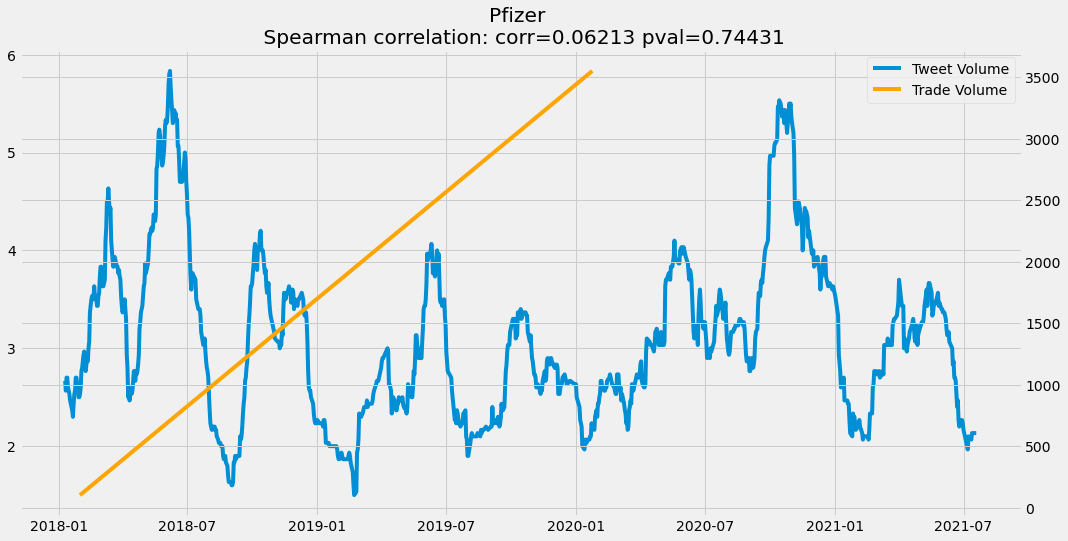

In [122]:
tweet_vol_affect(ppe,pfizer_stock,"Pfizer")    

Classifying positive and negative tweet for Pfizer

In [127]:
ppe['score'] =  ppe['text'].apply(lambda tweet: afinn.score(tweet))

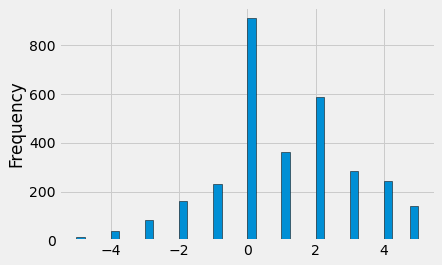

In [128]:
ppe.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

In [129]:
def sentiment_overtime(tweets,stock,title):
    visual= tweets.groupby('date')['score'].mean().shift(-1).rolling(30).mean().dropna()
    corr_test = tweets.groupby('date')['score'].mean().shift(-1).dropna()
    corr, pval = stat.spearmanr(corr_test.reindex(stock.index), stock['Open'],nan_policy='omit')

    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    ax1.plot(visual.index,visual,label='Tweets Sentiment')
    ax2.plot(stock.index,stock['Close'],color='orange',label='share price')
    ax2.set_title("Effects of "+title+" tweets to shareprice" +"\n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()

C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


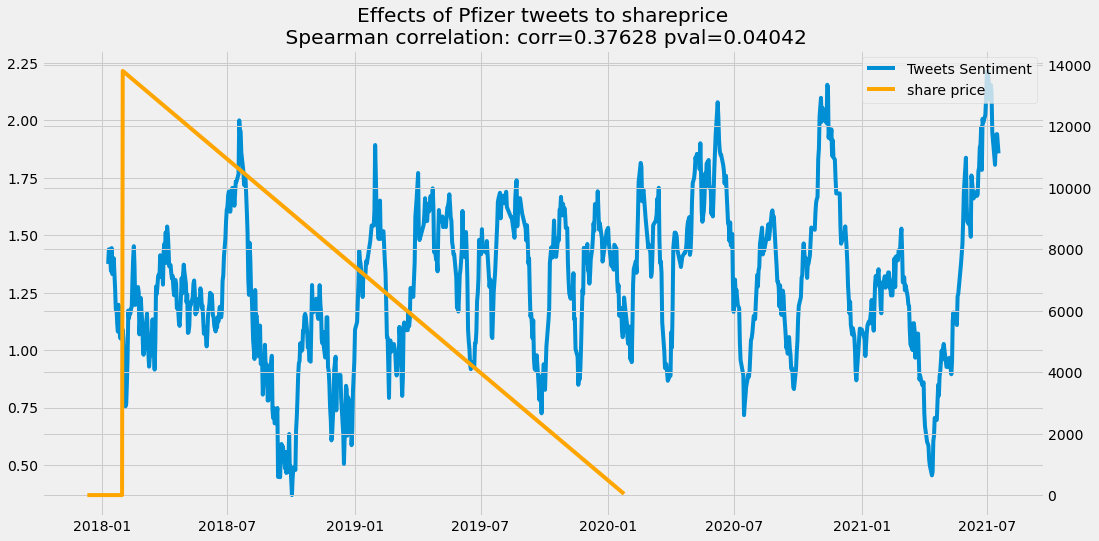

In [130]:
sentiment_overtime(ppe,pfizer_stock,"Pfizer");

Financial Companies Tweeter sentiment and Stock Price

In [131]:
### Twitter Authentification
ckey=log1['Key'][0]
cs=log1['Key'][1]
at = log1['Key'][2]
ats = log1['Key'][3]


In [132]:
#create the twitter authentication
aunthenticate = tweepy.OAuthHandler(ckey,cs)
aunthenticate.set_access_token(at,ats)
api = tweepy.API(aunthenticate,wait_on_rate_limit=True)

In [139]:
searchQuery1 = 'jpmorgan chase' #'#someHashtag'  # this is what we're searching for
maxTweets = 10000# Some arbitrary large number
tweetsPerQry = 100 # this is the max the API permits
fName = 'tweetsj.txt' # We'll store the tweets in a text file..

In [140]:
# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = None

# If results only below a specific ID are, set max_id to that ID.
# else default to no upper limit, start from the most recent tweet matching the search query.
max_id=-1
tweetCount = 0
#print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.user_timeline(screen_name = searchQuery1, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False,
                                count=tweetsPerQry)
                else:
                    new_tweets = api.user_timeline(screen_name = searchQuery1, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False,
                                count=tweetsPerQry,
                                max_id=str(max_id - 1),
                                since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets = api.user_timeline(screen_name = searchQuery1, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False, 
                                count=tweetsPerQry,
                                max_id=str(max_id - 1))
                else:
                    new_tweets = api.user_timeline(screen_name = searchQuery1, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False, count=tweetsPerQry,
                                            max_id=str(max_id - 1),
                                            since_id=sinceId)
            if not new_tweets:
                #print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) +
                        '\n')
            tweetCount += len(new_tweets)
            #print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break

In [141]:
tweets_data_path1 = 'tweetsj.txt'

tweets_data1 = []
tweets_file1 = open(tweets_data_path1, "r")
for line in tweets_file1:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [142]:
tweetsj = pd.DataFrame() #create pandas dataframe
tweetsj['TimeStamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweetsj['Name'] = list(map(lambda tweet: tweet["user"]["screen_name"], tweets_data))
tweetsj['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweetsj['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweetsj['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweetsj['Favorites'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
tweetsj['Retweet'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweetsj['in_reply_to_status_id_str'] = list(map(lambda tweet: tweet['in_reply_to_status_id_str'], tweets_data))
tweetsj['in_reply_to_screen_name'] = list(map(lambda tweet: tweet['in_reply_to_screen_name'], tweets_data))

,TimeStamp,Name,text,lang,tweet_id,Favorites,Retweet,in_reply_to_status_id_str,in_reply_to_screen_name
0,Mon Jul 19 14:24:01 +0000 2021,pfizer,Today we announced that Christopher Stevo has ...,en,1417128096273154051,28,2,None,None
1,Mon Jul 19 13:00:01 +0000 2021,pfizer,Health inequities impact patients with drug-re...,en,1417106957828296708,32,9,None,None
2,Sat Jul 17 15:00:13 +0000 2021,pfizer,Pfizer is committed to delivering breakthrough...,en,1416412431388192768,64,11,None,None
3,Thu Jul 15 20:26:22 +0000 2021,pfizer,We’re looking at menopause through a different...,en,1415769734038147081,48,7,None,None
4,Thu Jul 15 19:00:01 +0000 2021,pfizer,"“As a parent, when my daughters experience a f...",en,1415748000052174849,43,7,None,None
